In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('diamonds_train.pkl')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.32,Ideal,H,VVS1,62.7,55.0,692,4.37,4.40,2.75
1,1.26,Good,J,SI1,63.9,58.0,4255,6.78,6.74,4.32
2,0.30,Good,J,SI1,64.0,55.0,439,4.28,4.25,2.73
3,0.41,Ideal,E,VS2,62.5,55.0,935,4.74,4.77,2.97
4,0.71,Very Good,E,VS1,63.3,59.0,2946,5.64,5.67,3.58
...,...,...,...,...,...,...,...,...,...,...
43147,0.33,Premium,G,SI1,59.8,58.0,631,4.54,4.52,2.71
43148,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
43149,0.26,Ideal,E,VVS2,61.5,56.0,769,4.11,4.08,2.52
43150,0.40,Very Good,G,SI1,62.8,60.0,702,4.66,4.70,2.94


### TRAIN_TEST_SPLIT

In [4]:
train_df, test_df = train_test_split(df, shuffle=True, test_size=0.25, random_state=22)

# TRAINING

## PRE-PROCESSING

#### Eventuali NaN

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32364 entries, 37530 to 29484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    32364 non-null  float64
 1   cut      32364 non-null  object 
 2   color    32364 non-null  object 
 3   clarity  32364 non-null  object 
 4   depth    32364 non-null  float64
 5   table    32364 non-null  float64
 6   price    32364 non-null  int64  
 7   x        32364 non-null  float64
 8   y        32364 non-null  float64
 9   z        32364 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


#### Divido features e target

In [6]:
target_name = 'price'
X_train = train_df.drop(target_name, axis=1)
y_train = train_df[target_name]

#### Categorical Features

In [7]:
categorical_features = [col for col in df.columns if df[col].dtype==object]

dummies = pd.get_dummies(X_train[categorical_features], drop_first=True)

X_train = X_train.drop(categorical_features, axis=1)
X_train = X_train.join(dummies)

#### Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [9]:
X_train

array([[ 1.05257759,  0.73000738, -0.65726986, ...,  1.84430713,
        -0.26655716, -0.32068981],
       [-0.96777209, -1.70915737,  1.14575668, ..., -0.54220904,
        -0.26655716, -0.32068981],
       [-1.00986271, -0.87287232,  0.24424341, ..., -0.54220904,
         3.75154059, -0.32068981],
       ...,
       [-0.21014096,  4.07514762, -1.55878313, ..., -0.54220904,
         3.75154059, -0.32068981],
       [-1.11508926, -0.24565852, -0.20651322, ..., -0.54220904,
        -0.26655716,  3.11827806],
       [-0.54686591, -0.10627768,  0.24424341, ...,  1.84430713,
        -0.26655716, -0.32068981]])

## FITTING

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

In [11]:
params = {'n_neighbors':range(2,20)}
model = RandomizedSearchCV(KNeighborsRegressor(), param_distributions=params, scoring='r2', cv=KFold(10))
model.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': range(2, 20)},
                   scoring='r2')

# EVALUATION

## PRE-PROCESSING

#### Divido features e target

In [12]:
target_name = 'price'
X_test = test_df.drop(target_name, axis=1)
y_test = test_df[target_name]

#### Categorical Features

In [13]:
categorical_features = [col for col in df.columns if df[col].dtype==object]
dummies = pd.get_dummies(X_test[categorical_features], drop_first=True)
X_test = X_test.drop(categorical_features, axis=1)
X_test = X_test.join(dummies)

#### Standardization

In [14]:
X_test = scaler.transform(X_test)

## TEST PREDICTION

In [15]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [16]:
def evaluate(targets, preds, title, plots=True, verbose=True):
    
    mape = mean_absolute_percentage_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAPE: ', mape)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(np.arange(0,targets.max()), np.arange(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mape':mape, 'r2':r2}

TRAIN SET
MAPE:  0.08432128135804569
R2:  0.9782830661739291


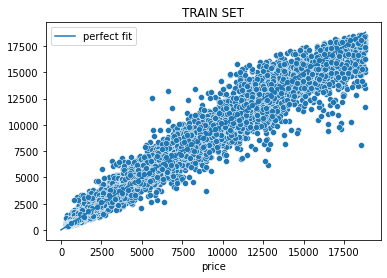

TEST SET
MAPE:  0.12861204540340535
R2:  0.9480843240876925


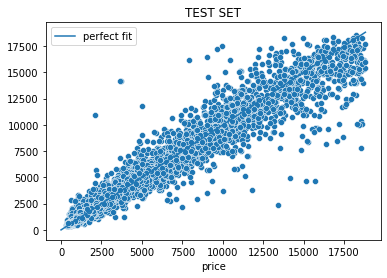

In [17]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(y_train, train_preds, 'TRAIN SET')
test_metrics = evaluate(y_test, test_preds, 'TEST SET')


# PREVISIONE FINALE

In [19]:
unlabeled_df = pd.read_pickle('diamonds_test.pkl')

## PRE-PROCESSING

In [20]:
X = unlabeled_df.copy()

### dummies
dummies = pd.get_dummies(X[categorical_features], drop_first=True)
X = X.drop(categorical_features, axis=1)
X = X.join(dummies)

### standardization
X = scaler.transform(X)

In [21]:
final_preds = model.predict(X)
final_preds = pd.Series(final_preds, index=unlabeled_df.index)

In [22]:
final_preds.to_csv('predizioni.csv')